In [69]:
import torch
import torchvision

from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

# transform torchvision dataset images from PILImage to tensor for input to CNN
data_transform = transforms.ToTensor()

train_data = FashionMNIST(root='./data', train = True, download = True, transform = data_transform)

test_data = FashionMNIST(root='./data', train = False, download = True, transform = data_transform)

print('Train data, number of images: ', len(train_data))
print('Test data, number of images: ', len(test_data))

Train data, number of images:  60000
Test data, number of images:  10000


In [70]:
batch_size = 20

train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle = True)

# What are the image classes into which we want to classify our images
# Find the Label Number and Description on the FashionMNIST Git
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

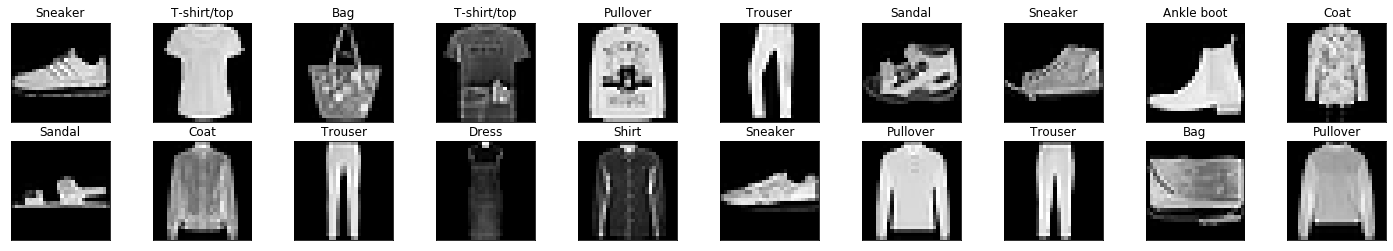

In [71]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# create an object that will iterate over the training dataset
dataiter = iter(train_loader)
# create one batch of training images
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch and the corresponding labels
fig = plt.figure(figsize = (25, 4))
for indx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size / 2, indx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[indx]), cmap='gray')
    ax.set_title(classes[labels[indx]])

In [72]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 10, 3)
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(10, 20, 3)
        
        self.fc1 = nn.Linear(20*5*5, 50)
        
        self.fc1_drop = nn.Dropout(p=0.4)        
        
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):
        #print('Tensor shape coming in: ', x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        #print('Tensor shape after pool/relu/conv1: ', x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        #print('Tensor shape after pool/relu/conv2: ', x.shape)
        x = x.view(x.size(0), -1)
        #print('Tensor shape after flattening: ', x.shape)
        x = F.relu(self.fc1(x))
        #print('Tensor shape after relu/fc1: ', x.shape)
        x = self.fc1_drop(x)        
        #print('Tensor shape after Dropout: ', x.shape)
        x = self.fc2(x)
        #print('Tensor shape after fc2: ', x.shape)
        x = F.log_softmax(x, dim = 1)
        #print('Tensor shape after Softmax: ', x.shape)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [73]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.001)

In [74]:
from torch.autograd import Variable

correct = 0
total = 0

for images, labels in test_loader:
    
    images = Variable(images)
    
    outputs = net(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels).sum()

accuracy = 100 * (correct.item() / total)

print('Accuracy before training: ', accuracy)

Accuracy before training:  8.9


In [75]:
from torch.autograd import Variable

def train(n_epochs):
    loss_over_time = []
    
    for epoch in range(n_epochs):
        
        running_loss = 0.0
        
        for batch_i, data in enumerate(train_loader):
            inputs, labels = data
            inputs, labels = Variable(inputs), Variable(labels)
            
            optimizer.zero_grad()
            
            outputs = net(inputs)
            
            loss = criterion(outputs, labels)
            
            loss.backward()
            
            optimizer.step()
            
            running_loss += loss.item()
            if batch_i %  1000 == 999: 
                avg_loss = running_loss/1000
                loss_over_time.append(avg_loss)
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i + 1, avg_loss))
                running_loss = 0.0
    
    print('Finished Training')
    return loss_over_time

In [76]:
n_epochs = 30

training_loss = train(n_epochs)

Epoch: 1, Batch: 1000, Avg. Loss: 2.298652372121811
Epoch: 1, Batch: 2000, Avg. Loss: 2.2762324030399324
Epoch: 1, Batch: 3000, Avg. Loss: 2.219888086080551
Epoch: 2, Batch: 1000, Avg. Loss: 1.9991894580125809
Epoch: 2, Batch: 2000, Avg. Loss: 1.5385048860311508
Epoch: 2, Batch: 3000, Avg. Loss: 1.3072952076792717
Epoch: 3, Batch: 1000, Avg. Loss: 1.2044579703211784
Epoch: 3, Batch: 2000, Avg. Loss: 1.1285518668293952
Epoch: 3, Batch: 3000, Avg. Loss: 1.0710361381173135
Epoch: 4, Batch: 1000, Avg. Loss: 1.0273395897746087
Epoch: 4, Batch: 2000, Avg. Loss: 0.9922996472120285
Epoch: 4, Batch: 3000, Avg. Loss: 0.9570050039589405
Epoch: 5, Batch: 1000, Avg. Loss: 0.9253818795084954
Epoch: 5, Batch: 2000, Avg. Loss: 0.9159573820829392
Epoch: 5, Batch: 3000, Avg. Loss: 0.8946753036379814
Epoch: 6, Batch: 1000, Avg. Loss: 0.863835491091013
Epoch: 6, Batch: 2000, Avg. Loss: 0.8665306414663791
Epoch: 6, Batch: 3000, Avg. Loss: 0.8381200420558452
Epoch: 7, Batch: 1000, Avg. Loss: 0.8214373187124

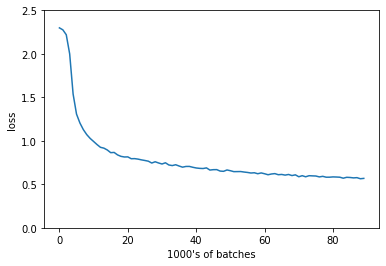

In [77]:
plt.plot(training_loss)
plt.xlabel('1000\'s of batches')
plt.ylabel('loss')
plt.ylim(0, 2.5)
plt.show()

In [78]:
# initialize tensor and lists to monitor test loss and accuracy
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# set the module to evaluation mode
net.eval()

for batch_i, data in enumerate(test_loader):
    
    # get the input images and their corresponding labels
    inputs, labels = data
    
    # forward pass to get outputs
    outputs = net(inputs)

    # calculate the loss
    loss = criterion(outputs, labels)
            
    # update average test loss 
    test_loss = test_loss + ((torch.ones(1) / (batch_i + 1)) * (loss.data - test_loss))
    
    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)
    
    # compare predictions to true label
    # this creates a `correct` Tensor that holds the number of correctly classified images in a batch
    correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))
    
    # calculate test accuracy for *each* object class
    # we get the scalar value of correct items for a class, by calling `correct[i].item()`
    for i in range(batch_size):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.503015

Test Accuracy of T-shirt/top: 81% (811/1000)
Test Accuracy of Trouser: 94% (945/1000)
Test Accuracy of Pullover: 64% (644/1000)
Test Accuracy of Dress: 86% (867/1000)
Test Accuracy of  Coat: 78% (787/1000)
Test Accuracy of Sandal: 91% (911/1000)
Test Accuracy of Shirt: 33% (339/1000)
Test Accuracy of Sneaker: 92% (929/1000)
Test Accuracy of   Bag: 95% (956/1000)
Test Accuracy of Ankle boot: 94% (944/1000)

Test Accuracy (Overall): 81% (8133/10000)


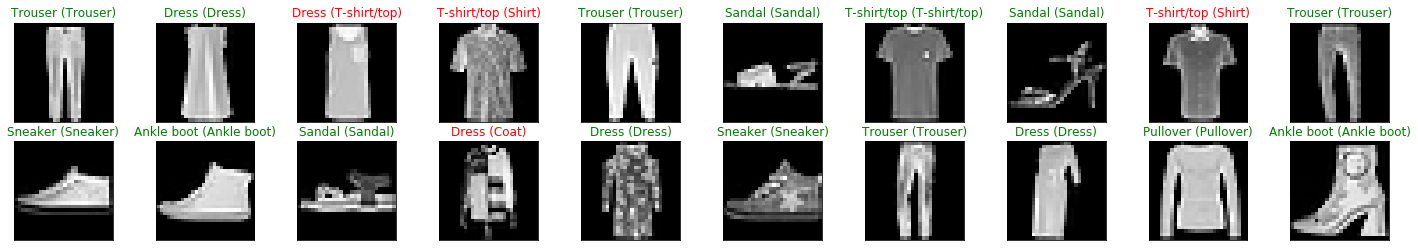

In [79]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
# get predictions
preds = np.squeeze(net(images).data.max(1, keepdim=True)[1].numpy())
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx] else "red"))